In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter
import plotly_express as px
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objects as go

In [55]:
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

In [56]:
df_merged = pd.read_csv('D:\\Projo\\data_cleaned_actors.csv', sep=',')

In [57]:
# Suppression des colonnes inutiles pour l'analyse
df_merged.drop(columns=['overview', 'poster_path', 'backdrop_path', 'nconst_director'], inplace=True)
df_merged.dropna(inplace=True)

df_merged.head(10)

,titleId,title,averageRating,numVotes,startYear,runtimeMinutes,genre1,genre2,popularity,production_companies_name,...,actor1,actor2,actor3,actor4,actor5,actor6,actor7,actor8,actor9,actor10
0,tt0035423,Kate et Léopold,6.4,88939.0,2001.0,118.0,Comedy,Fantasy,15.770,"Miramax, Konrad Pictures",...,Bradley Whitford,Paxton Whitehead,Matthew Sussman,Liev Schreiber,Meg Ryan,Hugh Jackman,Breckin Meyer,Spalding Gray,Natasha Lyonne,Josh Stamberg
1,tt0054632,L'année dernière à Marienbad,7.7,24793.0,1961.0,94.0,Drama,Mystery,11.284,"Argos Films, Cineriz, Silver Films, Terra Film...",...,Pierre Barbaud,Delphine Seyrig,Françoise Bertin,Sacha Pitoëff,Françoise Spira,Karin Toeche-Mittler,Wilhelm von Deek,Héléna Kornel,Giorgio Albertazzi,Luce Garcia-Ville
2,tt0054692,Sous le ciel bleu d'Hawaï,6.1,7478.0,1961.0,102.0,Comedy,Musical,10.444,"Hal Wallis Productions, Paramount",...,Howard McNear,Joan Blackman,Elvis Presley,Angela Lansbury,Steve Brodie,John Archer,Nancy Walters,Roland Winters,Iris Adrian,Christian Kay
3,tt0054698,Diamants sur canapé,7.6,191686.0,1961.0,115.0,Comedy,Drama,18.252,"Jurow-Shepherd, Paramount",...,José Luis de Vilallonga,Dorothy Whitney,Martin Balsam,John McGiver,Audrey Hepburn,George Peppard,Elvia Allman,Patricia Neal,Buddy Ebsen,Stanley Adams
4,tt0054847,Le Cid,7.2,15632.0,1961.0,182.0,Biography,Drama,13.196,"Samuel Bronston Productions, Allied Artists Pi...",...,Frank Thring,Michael Hordern,Gary Raymond,Geneviève Page,Hurd Hatfield,Massimo Serato,Raf Vallone,John Fraser,Sophia Loren,Charlton Heston
5,tt0054953,Les Canons de Navarone,7.5,55225.0,1961.0,158.0,Action,Adventure,15.708,"Columbia Pictures, Highroad Productions",...,David Niven,Anthony Quinn,Stanley Baker,Anthony Quayle,James Robertson Justice,Gia Scala,James Darren,Richard Harris,Irene Papas,Gregory Peck
6,tt0054997,L'Arnaqueur,8.0,86655.0,1961.0,134.0,Drama,Sport,12.066,"Rossen Films, 20th Century Fox",...,Jackie Gleason,Michael Constantine,Paul Newman,Stefan Gierasch,Jake LaMotta,Piper Laurie,Clifford A. Pellow,Murray Hamilton,Myron McCormick,George C. Scott
7,tt0055031,Jugement à Nuremberg,8.3,85083.0,1961.0,179.0,Drama,War,13.877,"United Artists, Roxlom Films",...,Maximilian Schell,Montgomery Clift,Spencer Tracy,Kenneth MacKenna,Burt Lancaster,Richard Widmark,Werner Klemperer,Marlene Dietrich,Judy Garland,William Shatner
8,tt0055047,Le roi des rois,7.0,8974.0,1961.0,168.0,Biography,Drama,12.283,"Samuel Bronston Productions, Metro-Goldwyn-Mayer",...,Siobhan McKenna,Viveca Lindfors,Hurd Hatfield,Brigid Bazlen,Jeffrey Hunter,Carmen Sevilla,Rip Torn,Rita Gam,Harry Guardino,Ron Randell
10,tt0055205,Le train de 16h50,7.3,8538.0,1961.0,87.0,Comedy,Crime,12.827,"Metro-Goldwyn-Mayer British Studios, George H....",...,Thorley Walters,James Robertson Justice,Stringer Davis,Conrad Phillips,Charles 'Bud' Tingwell,Arthur Kennedy,Margaret Rutherford,Joan Hickson,Muriel Pavlow,Ronald Howard


In [58]:
df_merged['genre1'].value_counts()

genre1
Action         1264
Drama           977
Comedy          877
Crime           388
Biography       350
Adventure       340
Horror          151
Animation        22
Mystery          18
Fantasy          15
Thriller          7
Western           3
Family            2
Romance           1
Sci-Fi            1
Documentary       1
History           1
Name: count, dtype: int64

In [59]:
df_merged.dtypes


titleId                       object
title                         object
averageRating                float64
numVotes                     float64
startYear                    float64
runtimeMinutes               float64
genre1                        object
genre2                        object
popularity                   float64
production_companies_name     object
Director_name                 object
actor1                        object
actor2                        object
actor3                        object
actor4                        object
actor5                        object
actor6                        object
actor7                        object
actor8                        object
actor9                        object
actor10                       object
dtype: object

In [60]:
df_merged.describe()

,averageRating,numVotes,startYear,runtimeMinutes,popularity
count,4418.000000,4.418000e+03,4418.000000,4418.000000,4418.000000
mean,6.934065,1.438925e+05,2003.177230,114.945903,29.460026
std,0.604025,2.282095e+05,15.188039,19.894435,130.312802
min,6.000000,5.026000e+03,1961.000000,85.000000,10.000000
25%,6.400000,2.514500e+04,1994.000000,101.000000,12.199250
50%,6.900000,6.424900e+04,2007.000000,111.000000,15.754500
75%,7.300000,1.653242e+05,2016.000000,125.000000,23.988500
max,9.300000,2.878611e+06,2024.000000,238.000000,5089.969000


In [61]:
# Les 20 films les mieux notés de 1980 à 2024

df_sorted_avg =  df_merged.sort_values(by='averageRating', ascending=False)
df_sorted_avg.head()

,titleId,title,averageRating,numVotes,startYear,runtimeMinutes,genre1,genre2,popularity,production_companies_name,...,actor1,actor2,actor3,actor4,actor5,actor6,actor7,actor8,actor9,actor10
1225,tt0111161,Les évadés,9.3,2878611.0,1994.0,142.0,Drama,Drama,84.139,Castle Rock Entertainment,...,Mark Rolston,James Whitmore,Larry Brandenburg,Morgan Freeman,Gil Bellows,Tim Robbins,Jeffrey DeMunn,William Sadler,Clancy Brown,Bob Gunton
233,tt0068646,Le Parrain,9.2,2004826.0,1972.0,175.0,Crime,Drama,113.216,"Alfran Productions, Paramount",...,Robert Duvall,Richard Conte,Al Pacino,James Caan,Richard S. Castellano,Diane Keaton,John Marley,Marlon Brando,Sterling Hayden,Al Lettieri
284,tt0071562,"Le Parrain, 2ᵉ partie",9.0,1359986.0,1974.0,202.0,Crime,Drama,55.942,"The Coppola Company, Paramount",...,Robert Duvall,Talia Shire,Michael V. Gazzo,John Cazale,Al Pacino,Richard Bright,Robert De Niro,Diane Keaton,G.D. Spradlin,Lee Strasberg
1667,tt0167260,Le Seigneur des anneaux : Le Retour du roi,9.0,1972573.0,2003.0,201.0,Action,Adventure,65.571,"New Line Cinema, WingNut Films, The Saul Zaent...",...,Ian McKellen,Sean Astin,Ali Astin,Elijah Wood,Sean Bean,Noel Appleby,Orlando Bloom,Viggo Mortensen,David Aston,John Bach
2475,tt0468569,The Dark Knight : Le Chevalier noir,9.0,2861067.0,2008.0,152.0,Action,Crime,81.582,"DC Comics, Isobel Griffiths, Syncopy, Warner B...",...,Cillian Murphy,Morgan Freeman,Gary Oldman,Michael Caine,Ron Dean,Maggie Gyllenhaal,Aaron Eckhart,Christian Bale,Heath Ledger,Monique Gabriela Curnen


In [75]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4418 entries, 0 to 5149
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   titleId                    4418 non-null   object 
 1   title                      4418 non-null   object 
 2   averageRating              4418 non-null   float64
 3   numVotes                   4418 non-null   float64
 4   startYear                  4418 non-null   float64
 5   runtimeMinutes             4418 non-null   float64
 6   genre1                     4418 non-null   object 
 7   genre2                     4418 non-null   object 
 8   popularity                 4418 non-null   float64
 9   production_companies_name  4418 non-null   object 
 10  Director_name              4418 non-null   object 
 11  actor1                     4418 non-null   object 
 12  actor2                     4418 non-null   object 
 13  actor3                     4418 non-null   object 
 1

In [62]:
# Moyenne durée des 20 films les mieux notés
df_mean_avg = df_sorted_avg['runtimeMinutes'].head(20).mean()
df_mean_avg = df_mean_avg.round()
df_mean_avg

156.0

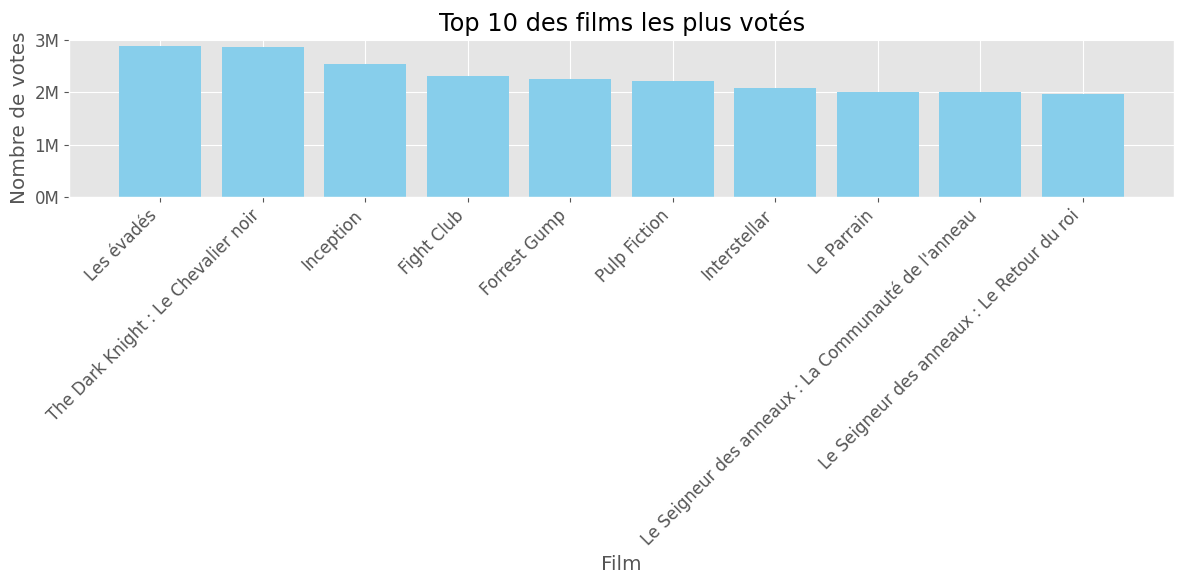

In [63]:
# Top 10 des films les plus votés
df_sorted_numVotes = df_merged.sort_values(by='numVotes', ascending=False).head(10)

# Fonction de formatage des ticks
def thousands_formatter(x, pos):
    return f'{int(x/1000000)}M'

# Création du graphique
plt.figure(figsize=(12, 6))
plt.bar(df_sorted_numVotes['title'], df_sorted_numVotes['numVotes'], color='skyblue')
plt.xlabel('Film')
plt.ylabel('Nombre de votes')
plt.title('Top 10 des films les plus votés')
plt.xticks(rotation=45, ha='right')
plt.gca().yaxis.set_major_formatter(FuncFormatter(thousands_formatter))
plt.tight_layout()
plt.show()

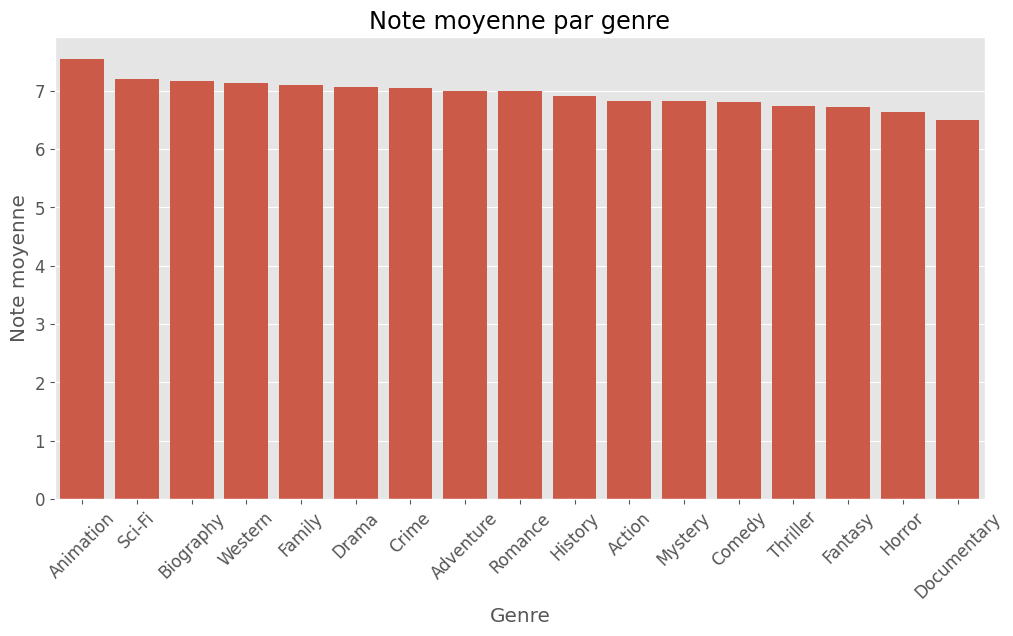

In [64]:
# 1. Note moyenne par genre
avg_rating_by_genre = df_merged.groupby('genre1')['averageRating'].mean().reset_index()
avg_rating_by_genre = avg_rating_by_genre.sort_values(by='averageRating', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='genre1', y='averageRating', data=avg_rating_by_genre)
plt.title('Note moyenne par genre')
plt.xlabel('Genre')
plt.ylabel('Note moyenne')
plt.xticks(rotation=45)
plt.show()

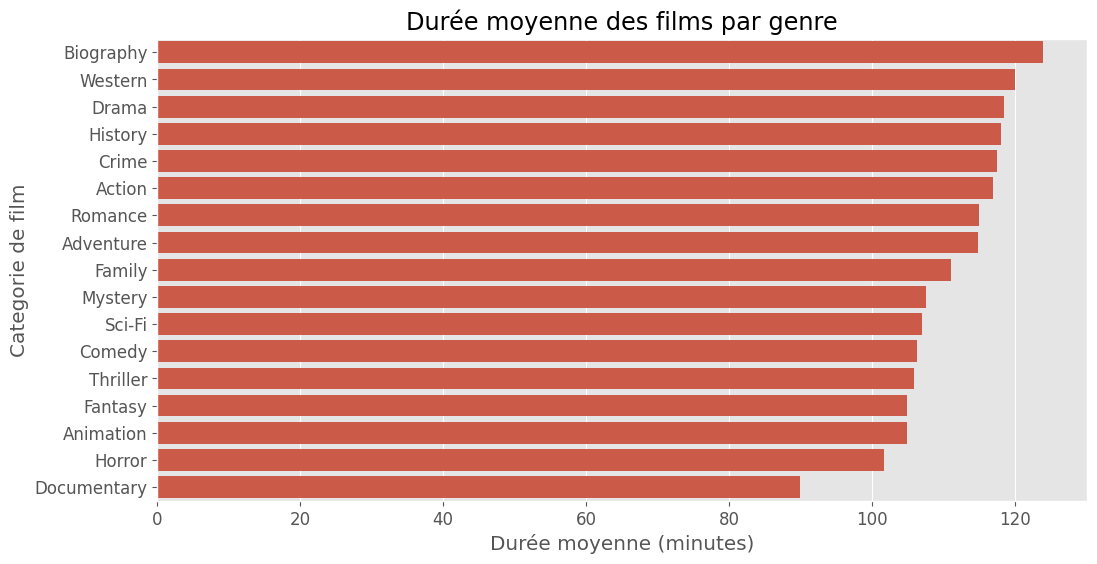

In [65]:
# 3. Temps de visionnage moyen par production
runtime_by_production = df_merged.groupby('genre1')['runtimeMinutes'].mean().reset_index()
runtime_by_production = runtime_by_production.sort_values(by='runtimeMinutes', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='runtimeMinutes', y='genre1', data=runtime_by_production)
plt.title('Durée moyenne des films par genre')
plt.xlabel('Durée moyenne (minutes)')
plt.ylabel('Categorie de film')
plt.show()

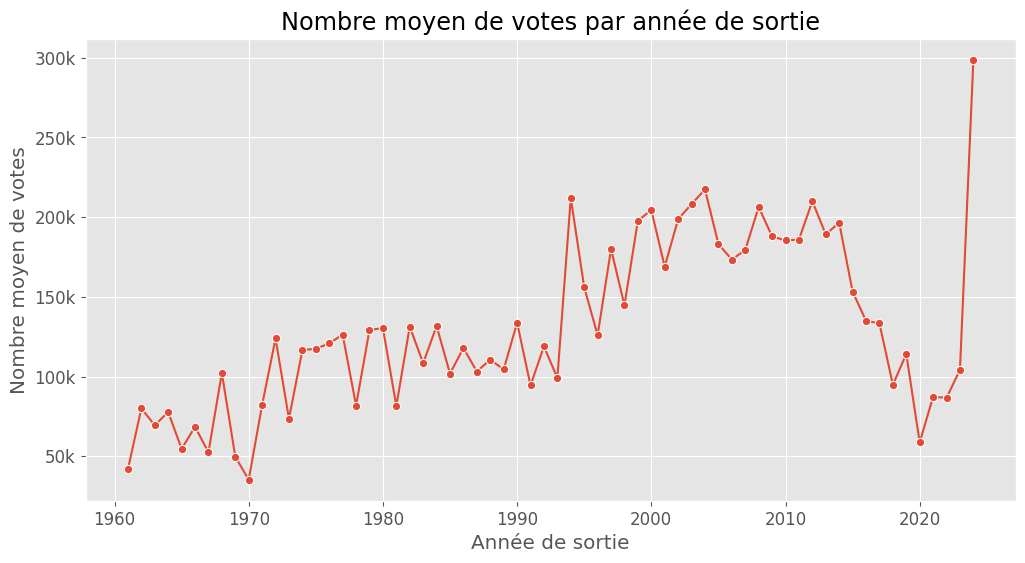

In [66]:
# 4. Votes moyens par année de sortie
votes_by_year = df_merged.groupby('startYear')['numVotes'].mean().reset_index()
votes_by_year = votes_by_year.sort_values(by='startYear')

# Fonction de formatage des ticks
def thousands_format(x, pos):
    return f'{int(x/1000)}k'

plt.figure(figsize=(12, 6))
sns.lineplot(x='startYear', y='numVotes', data=votes_by_year, marker='o')
plt.title('Nombre moyen de votes par année de sortie')
plt.xlabel('Année de sortie')
plt.ylabel('Nombre moyen de votes')
plt.gca().yaxis.set_major_formatter(FuncFormatter(thousands_format))
plt.show()

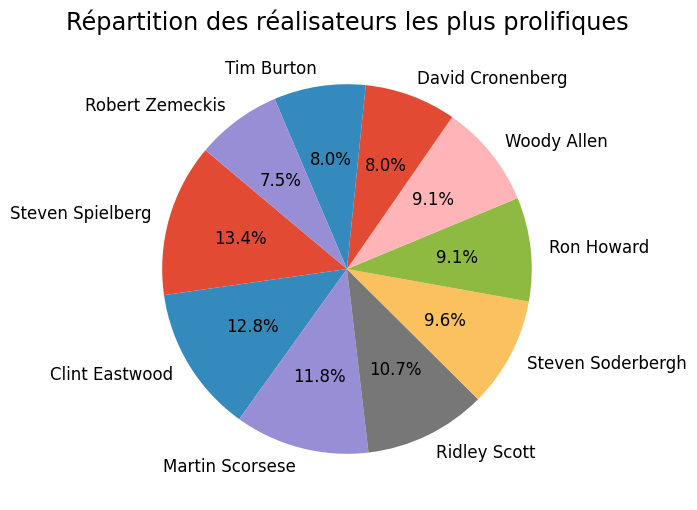

In [67]:
# Ajouter les années et leur genre de predilection dominant top 5
# faire un graphique des meilleures réalisateurs par films a succés
top_directors = df_merged['Director_name'].value_counts().head(10)
plt.figure(figsize=(10, 6))
plt.pie(top_directors, labels=top_directors.index, autopct='%1.1f%%', startangle=140)
plt.title('Répartition des réalisateurs les plus prolifiques')
plt.show()

In [ ]:
# Les acteurs et actrices les plus sollicités
titleId	title	averageRating	numVotes	startYear	runtimeMinutes	genre1	genre2	popularity	production_companies_name	...	actor1	actor2	actor3	actor4	actor5	actor6	actor7	actor8	actor9	actor10



In [70]:
# Créer une liste de toutes les colonnes d'acteurs/actrices
actor_columns = ['actor1', 'actor2', 'actor3', 'actor4', 'actor5', 'actor6', 'actor7', 'actor8', 'actor9', 'actor10']

# Compter le nombre de fois où chaque acteur/actrice apparaît dans les colonnes
actor_counts = pd.Series(dtype=int)
for col in actor_columns:
    actor_counts = actor_counts.add(df_merged[col].value_counts(), fill_value=0)

# Trier les acteurs/actrices par leur fréquence d'apparition
top_actors = actor_counts.sort_values(ascending=False).head(10)

# Visualiser les résultats
print("Les 10 acteurs/actrices les plus sollicités :\n", top_actors)


Les 10 acteurs/actrices les plus sollicités :
 Robert De Niro       49.0
Samuel L. Jackson    43.0
Brad Pitt            38.0
Morgan Freeman       36.0
Denzel Washington    35.0
Willem Dafoe         35.0
Mark Wahlberg        35.0
Cate Blanchett       34.0
Christian Bale       34.0
Liam Neeson          34.0
dtype: float64


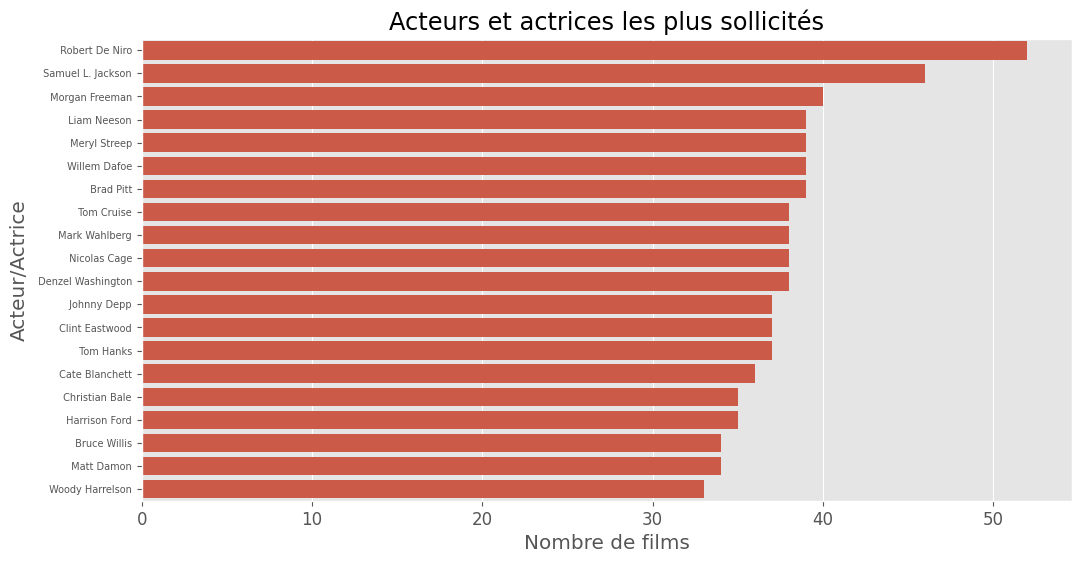

In [ ]:
# Diagramme en barres pour les acteurs les plus sollicités
plt.figure(figsize=(12, 6))
sns.barplot(x=count_actors.head(20).values, y=count_actors.head(20).index)
plt.title('Acteurs et actrices les plus sollicités')
plt.xlabel('Nombre de films')
plt.ylabel('Acteur/Actrice')
plt.tick_params(axis='y', labelsize=7)
plt.show()


# TRIER LES ACTEURS PAR NOMBRE DE FILMS LES PLUS SOLICITES ET LES ANNÉES 



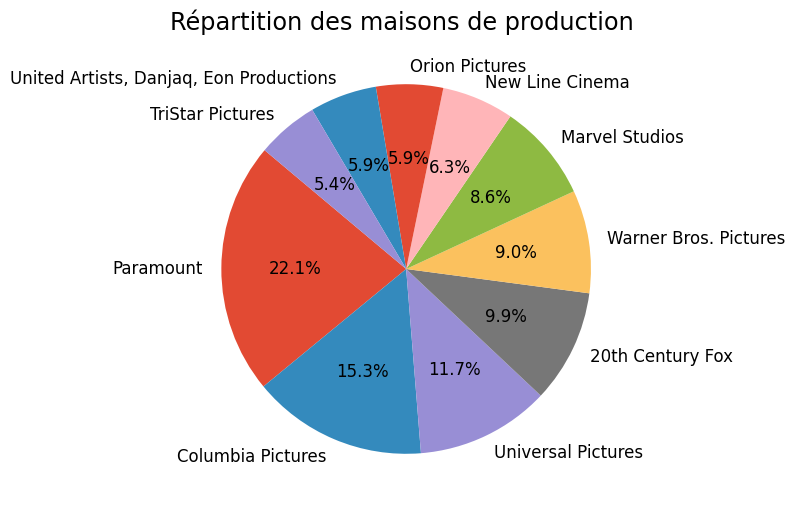

In [ ]:
# Compagnies de production les plus populaires
# les réalisateurs les plus sollicités
# Ajouter les années
# faire un graphique des meilleures réalisateurs par films a succés
top_directors = df_merged['production_companies_name'].value_counts().head(10)
plt.figure(figsize=(10, 6))
plt.pie(top_directors, labels=top_directors.index, autopct='%1.1f%%', startangle=140)
plt.title('Répartition des maisons de production ')
plt.show()


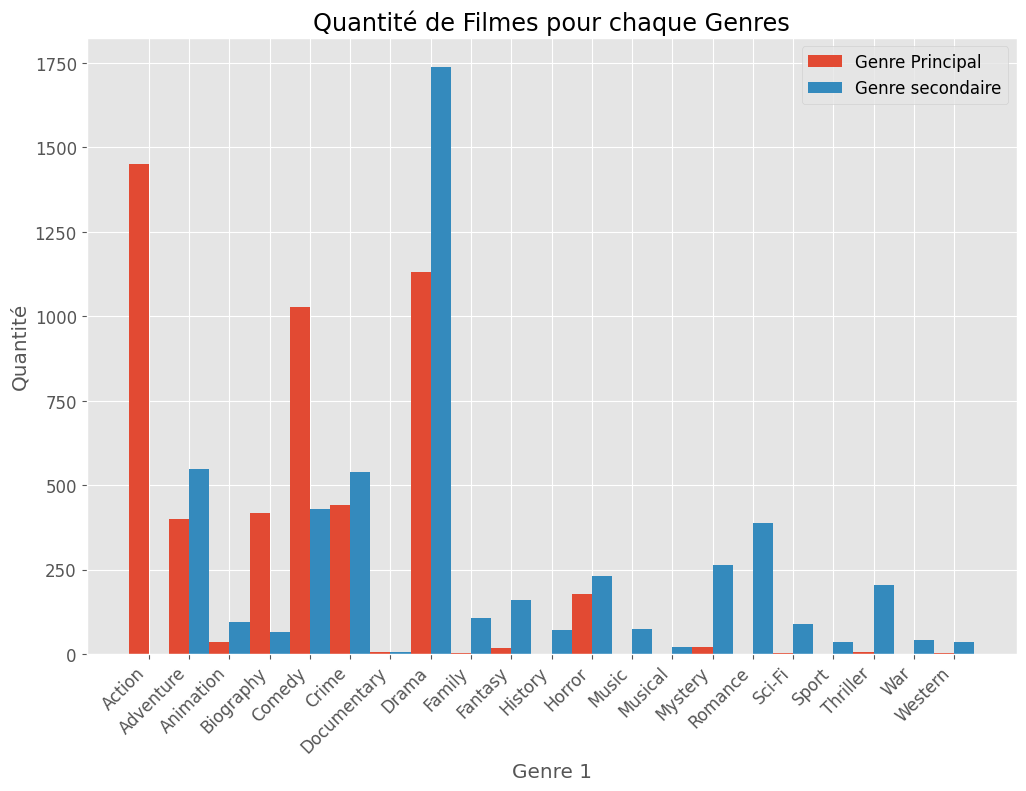

In [ ]:
genero1_counts = df_merged['genre1'].value_counts()
genero2_counts = df_merged['genre2'].value_counts()

#Combinando os índices de ambas as séries para garantir que todos os gêneros estejam presentes
index = genero1_counts.index.union(genero2_counts.index)

#Preenchendo os valores ausentes com 0
genero1_counts = genero1_counts.reindex(index, fill_value=0)
genero2_counts = genero2_counts.reindex(index, fill_value=0)

#Plotando o gráfico de barras
fig, ax = plt.subplots()

#Configurando a largura das barras
bar_width = 0.5

#Calculando a posição das barras
x = range(len(index))

#Plotando as barras para Genero1
bars1 = ax.bar(x, genero1_counts.values, bar_width, label='Genre Principal')

#Plotando as barras para Genero2 com um deslocamento de bar_width
bars2 = ax.bar([i + bar_width for i in x], genero2_counts.values, bar_width, label='Genre secondaire')

#Configurando os rótulos e ticks do eixo x
ax.set_xticks([i + bar_width / 2 for i in x])
ax.set_xticklabels(index, rotation=45, ha='right')

#Adicionando legendas e rótulos de eixo
ax.legend()
ax.set_xlabel('Genre 1')
ax.set_ylabel('Quantité')
ax.set_title('Quantité de Filmes pour chaque Genres')

plt.show()

In [ ]:
# Evolution des genres de film par décennie

df_merged['startYear'] = df_merged['startYear'].astype(int)

# Filtrer les données pour les années en décennies jusqu'en 2023
df_filtered = df_merged[df_merged['startYear'] <= 2023]

# Ajouter une colonne pour les décennies
df_filtered['decade'] = (df_filtered['startYear'] // 10) * 10

# Calculer le total par genre pour chaque décennie
df_genre_count = df_filtered.groupby(['decade', 'genre1']).size().reset_index(name='total_genre')

# Créer un bar chart avec animation par décennie
fig = px.bar(df_genre_count, 
             x='genre1', 
             y='total_genre', 
             color='genre1', 
             animation_frame='decade', 
             title='Evolution des genres de film par décennie',
             category_orders={'decade': list(range(df_genre_count['decade'].min(), 2024, 10))})

# Ajuster les limites de l'axe Y
fig.update_layout(yaxis_range=[0, df_genre_count['total_genre'].max() * 1.1])

# Réduire la vitesse de l'animation
animation_settings = {
    "frame": {"duration": 2000, "redraw": True}, # Durée de chaque frame en millisecondes
    "fromcurrent": True, 
    "transition": {"duration": 500, "easing": "quadratic-in-out"}, # Durée de la transition entre frames
}

fig.show()

C:\Users\pnii\AppData\Local\Temp\ipykernel_25860\3363441023.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
# Extraire la décennie de l'année de sortie
df_merged['decade'] = (df_merged['startYear'] // 10) * 10

# Exploser les acteurs/actrices dans des lignes séparées
df_exploded = df_merged.explode('Actors_Actresses')

# Compter le nombre de films pour chaque acteur/actrice par décennie
actor_counts_by_decade = df_exploded.groupby(['decade', 'Actors_Actresses']).size().reset_index(name='film_count')

# Identifier les 5 acteurs/actrices les plus prolifiques pour chaque décennie
top_actors_by_decade = actor_counts_by_decade.sort_values(by=['decade', 'film_count'], ascending=[True, False])
top_actors_by_decade = top_actors_by_decade.groupby('decade').head(5)

# Créer un graphique à barres animé avec une vitesse réduite
fig = px.bar(top_actors_by_decade, 
             x='Actors_Actresses', 
             y='film_count', 
             color='Actors_Actresses', 
             animation_frame='decade', 
             range_y=[0, top_actors_by_decade['film_count'].max() + 5],
             title='Top 5 acteurs/actrices les plus prolifiques par décennie',
             labels={'film_count': 'Nombre de films', 'Actors_Actresses': 'Acteur/Actrice'},
             height=600)

# Ralentir la vitesse du diaporama en ajustant le frame_duration (par exemple, 1000 millisecondes)
fig.layout.updatemenus[0].buttons[0].args[1]['frame']['duration'] = 2000

fig.update_layout(xaxis={'categoryorder':'total descending'}, showlegend=False)
fig.show()



In [88]:
df = df_merged

In [89]:
# Convertir la colonne startYear en type int pour faciliter le filtrage par décennie
df['startYear'] = df['startYear'].astype(int)

# Ajouter une colonne pour représenter la décennie
df['decade'] = (df['startYear'] // 10) * 10


In [90]:
# Créer une liste unique d'acteurs
all_actors = df[['actor1', 'actor2', 'actor3', 'actor4', 'actor5', 'actor6', 'actor7', 'actor8', 'actor9', 'actor10']].values.flatten()
unique_actors = set(all_actors)

# Créer un DataFrame vide pour stocker les moyennes de note par acteur et par décennie
actor_ratings = pd.DataFrame(columns=['Actor', 'Decade', 'AverageRating'])


In [91]:
# Calculer les moyennes de note pour chaque acteur et chaque décennie
for actor in unique_actors:
    if pd.notnull(actor):
        actor_mask = df.isin([actor]).any(axis=1)
        actor_data = df[actor_mask]
        actor_decade_avg = actor_data.groupby('decade')['averageRating'].mean().reset_index()
        actor_decade_avg['Actor'] = actor
        actor_ratings = pd.concat([actor_ratings, actor_decade_avg])


KeyboardInterrupt: 

In [ ]:
# Sélectionner les cinq meilleurs acteurs par décennie
top_actors_by_decade = actor_ratings.sort_values(by=['Decade', 'AverageRating'], ascending=[True, False]).groupby('Decade').head(5)

# Créer un graphique animé avec Plotly Express
fig = px.bar(top_actors_by_decade, x="Decade", y="AverageRating", color="Actor", animation_frame="Decade", 
             title="Top 5 des acteurs par décennie en fonction de la note moyenne de leurs films")
fig.update_layout(xaxis=dict(title="Décennie"), yaxis=dict(title="Note moyenne"))
fig.show()